# CASE STUDY : CREDIT CARD FRAUD DETECTION

by Vinodhini Rajamanickam

### import necessary libraries

In [68]:
#data manipulation
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#to split into train and test
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler

#to check time
import time

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#evaluation
from sklearn.metrics import f1_score , plot_confusion_matrix,confusion_matrix

#balancing data
from imblearn.over_sampling import SMOTE

### read data

In [69]:
#load the data
data = pd.read_csv("creditcard.csv")

In [70]:
#check the shape of the data
data.shape

(284807, 31)

In [71]:
#print the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
#check for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [73]:
#our target varibale is "Class". 
#check the unique values in the class column
data["Class"].unique()

array([0, 1], dtype=int64)

In [74]:
#check for the number of different values in class
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

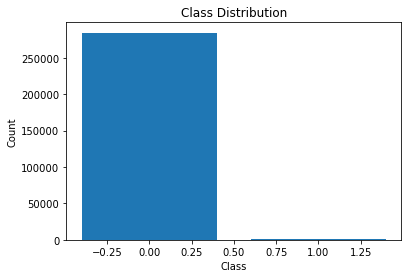

In [75]:
#visualize the class distribution of the "Class" variable in the dataset.

class_counts = data["Class"].value_counts()
class_labels = class_counts.index

plt.bar(class_labels, class_counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


The observed dataset exhibits a substantial class imbalance, with Class 0 containing 284,315 instances, 
which is considerably larger than Class 1, comprising only 492 instances. Therefore, it is necessary to 
address this imbalance by employing data balancing techniques such as undersampling, oversampling, or SMOTE. 

In this particular case, SMOTE will be utilized. It is important to note that data balancing is performed subsequent
to the splitting of data into training and testing sets, and it is applied exclusively to the training data.

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [77]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### check for duplicate values

In [78]:
#check for duplicate values
data.duplicated().sum()

1081

In [79]:
#shape of original data
data.shape

(284807, 31)

In [80]:
#drop duplicated values
data.drop_duplicates(inplace = True)

In [81]:
#check the shape after removing duplicated values
data.shape

(283726, 31)

In [82]:
#check if any duplicated value left
data.duplicated().sum()

0

### define X and y value

In [83]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [84]:
#print X
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [85]:
#print y
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

### drop unwanted column

In [86]:
#dropping unwanted column
X.drop("Time",axis = 1,inplace = True)

In [87]:
#print data after removing the column
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


### train test split

module : from sklearn.model_selection import train_test_split

In [88]:
#split data into train and test data
#80% - train data
#20% - test data
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2, random_state = 0)

### preprocessing

module:  from sklearn.preprocessing import StandardScaler
#we will use Scaling here

In [89]:
#preprocessing
#creating object for StandardScaler()
ss = StandardScaler()

train data

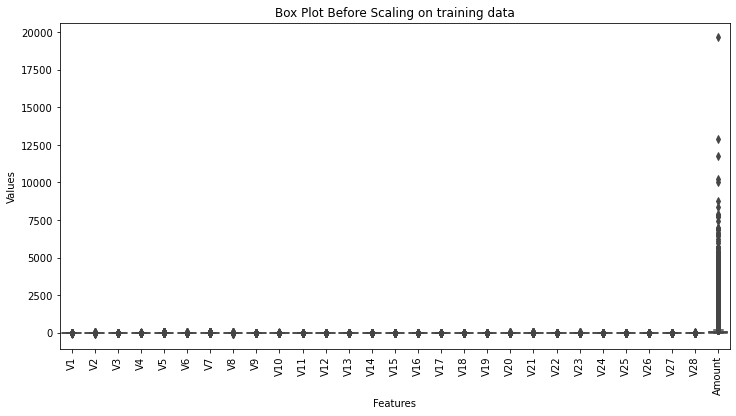

In [90]:
# Plot box plot before scaling on training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot Before Scaling on training data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

The box plots shows huge variations in the ranges and scales of different features, it indicates the need for scaling. We can apply scaling techniques such as StandardScaler or MinMaxScaler to normalize the features and make them comparable.

In this case we are applying Standard Scaler

In [91]:
#apply scaling on train data
X_train = ss.fit_transform(X_train)

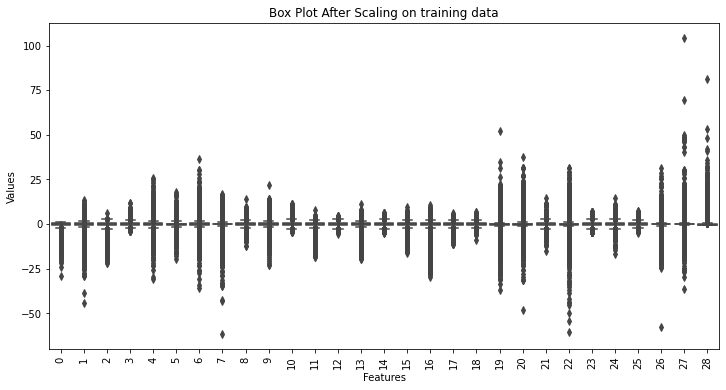

In [92]:
# Plot box plot after scaling on training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot After Scaling on training data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

test data

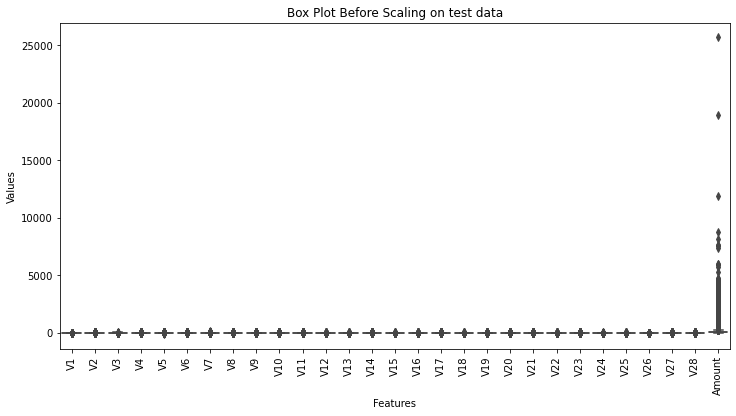

In [93]:
# Plot box plot before scaling on test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot Before Scaling on test data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [94]:
#apply scaling on test data
X_test = ss.transform(X_test)

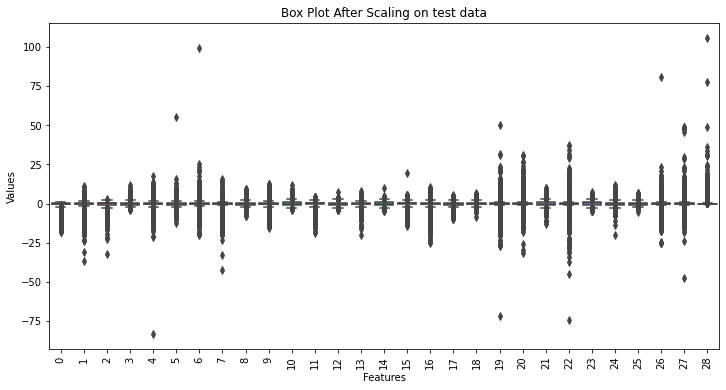

In [95]:
# Plot box plot After scaling on test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot After Scaling on test data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

## Balancing data

#### Random Under Sampling Technique

In [96]:
from imblearn.under_sampling import RandomUnderSampler

In [97]:

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform random undersampling
X_train, y_train = undersampler.fit_resample(X_train, y_train)

y_train.value_counts()

# # Create a new DataFrame with the undersampled data
# undersampled_data = pd.DataFrame(X_resampled, columns=X.columns)
# undersampled_data['target'] = y_resampled

# # Check the class distribution after undersampling
# print(undersampled_data['target'].value_counts())

0    386
1    386
Name: Class, dtype: int64

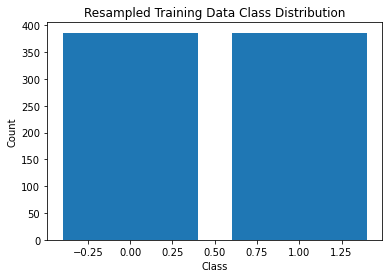

In [98]:
#To visualize the class distribution of the resampled training data .

class_counts = y_train.value_counts()
class_labels = class_counts.index

plt.bar(class_labels, class_counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Resampled Training Data Class Distribution")
plt.show()

### SMOTE Technique

module : from imblearn.over_sampling import SMOTE

In [99]:
# #create object for SMOTE
# smote = SMOTE(random_state = 42)

In [100]:
# X_train , y_train = smote.fit_resample(X_train, y_train)

In [101]:
# y_train.value_counts()


In [102]:
# #To visualize the class distribution of the resampled training data .

# class_counts = y_train.value_counts()
# class_labels = class_counts.index

# plt.bar(class_labels, class_counts)
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.title("Resampled Training Data Class Distribution")
# plt.show()


Ater applying the random under sampling technique to the imbalanced dataset, it is evident that the data has been successfully balanced, as observed from the equalized distribution of classes.

# MODEL COMPARISON
as this is a binary classification problem we will apply the following models and compare between these models to check which one of these is working best:

a) Logistic Regression

b) support Vector classifier

c) k nearest neighbors

d) Decision Tree Classifier

e) Random Forest Classifier

f) Gradient Boosting

## LOGISTIC REGRESSION

modules :  from sklearn.linear_model import LogisticRegression

         import time

In [103]:
#create object for logistic regression
logreg = LogisticRegression()

In [104]:
#on train data

start = time.time()

#fit the model
logreg.fit(X_train, y_train)

#check for accuracy on train data
print("logistic score : ", logreg.score(X_train,y_train))

end = time.time()
print("time taken : ", end-start)

logistic score :  0.9468911917098446
time taken :  0.009001970291137695


In [105]:
#on test data

start = time.time()

#check for accuracy on test data
print("logistic score : ", logreg.score(X_test,y_test))

end = time.time()
print("time taken : ", end-start)

logistic score :  0.9672223592852359
time taken :  0.008005142211914062


## SUPPORT VECTOR CLASSIFIER

module : from sklearn.svm import SVC

In [106]:
#create object for support vector classifier
svc = SVC()

In [107]:
#on train data

start = time.time()

#fit the model
svc.fit(X_train, y_train)

#check for accuracy on train data
print("svc score : ", svc.score(X_train,y_train))

end = time.time()
print("time taken : ", end-start)

svc score :  0.9287564766839378
time taken :  0.024013280868530273


In [108]:
#on test data

start = time.time()

#check for accuracy on test data
print("svc score : ", svc.score(X_test,y_test))

end = time.time()
print("time taken : ", end-start)

svc score :  0.9872590138511965
time taken :  1.1572680473327637


## K NEAREST NEIGHBORS

module : from sklearn.neighbors import KNeighborsClassifier

In [109]:
#create object for knn
knn = KNeighborsClassifier()

In [110]:
#on training data

start = time.time()

#fit the model
knn.fit(X_train, y_train)

#check for accuracy on train data
print("knn score : ", knn.score(X_train,y_train))

end = time.time()
print("time taken : ", end-start)


knn score :  0.939119170984456
time taken :  0.029997825622558594


In [111]:
#on testing data

start = time.time()

#check for accuracy on test data
print("knn score : ", knn.score(X_test,y_test))

end = time.time()
print("time taken : ", end-start)

knn score :  0.9787297783103655
time taken :  2.000908851623535


## DECISION TREE

module : from sklearn.tree import DecisionTreeClassifier

In [112]:
#create object for DecisionTreeClassifier()
dtc = DecisionTreeClassifier()

In [113]:
#on training data

start = time.time()

#fit the model
dtc.fit(X_train, y_train)

#check for accuracy on train data
print("dtc score : ", dtc.score(X_train,y_train))

end = time.time()
print("time taken : ", end-start)

dtc score :  1.0
time taken :  0.014003276824951172


In [114]:
#on testing data

start = time.time()

#check for accuracy on test data
print("dtc score : ", dtc.score(X_test,y_test))

end = time.time()
print("time taken : ", end-start)

dtc score :  0.9020723927677722
time taken :  0.03700900077819824


## RANDOM FOREST CLASSIFIER

module : from sklearn.ensemble import RandomForestClassifier

In [115]:
#create object for RandomForestClassifier()
rfc = RandomForestClassifier()

In [116]:
#training data

start = time.time()

#fit the model
rfc.fit(X_train, y_train)

#check for the accuracy on train data
print("rfc score : ", rfc.score(X_train,y_train))

end = time.time()
print("time taken : ", end-start)

rfc score :  1.0
time taken :  0.21205759048461914


In [117]:
#testing data

start = time.time()

#check for the accuracy on test data
print("rfc score : ", rfc.score(X_test,y_test))

end = time.time()
print("time taken : ", end-start)

rfc score :  0.975416769463927
time taken :  0.3600802421569824


## GRADIENT BOOSTING

module : from sklearn.ensemble import GradientBoostingClassifier

In [118]:
#create object forGradientBoostingClassifier()
gbc = GradientBoostingClassifier()

In [119]:
#training data

start = time.time()

#fit the model
gbc.fit(X_train, y_train)

#check for the accuracy on train data
print(gbc.score(X_train,y_train))

end = time.time()
print("time taken : ", end-start)

0.9987046632124352
time taken :  0.4461081027984619


In [120]:
#testing data

start = time.time()

#check for the accuracy on test data
print(gbc.score(X_test,y_test))

end = time.time()
print("time taken : ", end-start)

0.9657244563493462
time taken :  0.09401988983154297


### f1 score for all the models

module : from sklearn.metrics import f1_score , plot_confusion_matrix

In [121]:
#to check the document of f1 score function
?f1_score

In [122]:
#logistics regression

y_pred_logreg = logreg.predict(X_test)
f1_score(y_test, y_pred_logreg)

0.07829534192269573

In [123]:
#svc

y_pred_svc = svc.predict(X_test)
f1_score(y_test, y_pred_svc)

0.1755986316989738

In [124]:
#knn

y_pred_knn = knn.predict(X_test)
f1_score(y_test, y_pred_knn)

0.11575091575091574

In [125]:
#decision tree

y_pred_dtc = dtc.predict(X_test)
f1_score(y_test, y_pred_dtc)

0.027306143882373533

In [126]:
#rfc

y_pred_rfc = rfc.predict(X_test)
f1_score(y_test, y_pred_rfc)

0.10173857050869285

In [127]:
#gbc

y_pred_gbc = gbc.predict(X_test)
f1_score(y_test, y_pred_gbc)

0.0777619724988146

### confusion matrix for all the models

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


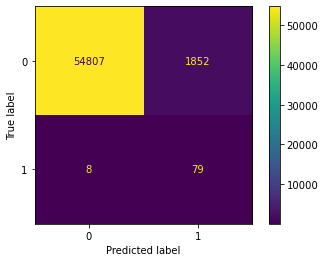

In [128]:
#logistics regression

plot_confusion_matrix(logreg,X_test, y_test)
#confusion_matrix(y_test, y_pred_logreg)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


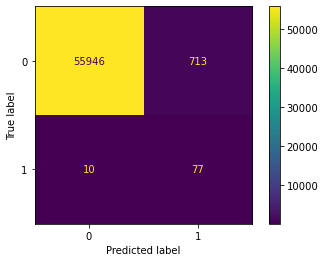

In [129]:
#support vector classifier

plot_confusion_matrix(svc,X_test, y_test)
#confusion_matrix(y_test, y_pred_svc)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


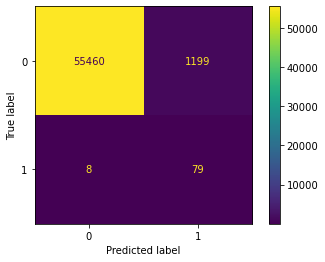

In [130]:
#k knearest neighbors

plot_confusion_matrix(knn,X_test, y_test)
#confusion_matrix(y_test, y_pred_knn)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


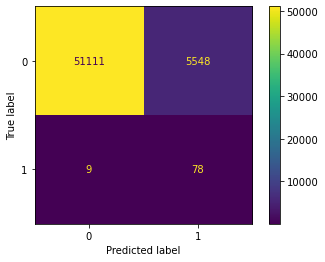

In [131]:
#decision tree classifier

plot_confusion_matrix(dtc,X_test, y_test)
#confusion_matrix(y_test, y_pred_dtc)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


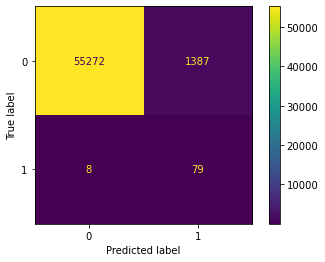

In [132]:
#random forest

plot_confusion_matrix(rfc,X_test, y_test)
#confusion_matrix(y_test, y_pred_rfc)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


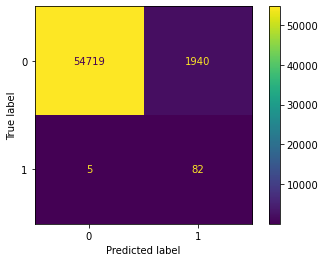

In [133]:
#gradient boosting

plot_confusion_matrix(gbc,X_test, y_test)
#confusion_matrix(y_test, y_pred_gbc)

## Model Evaluation

Based on the scores you provided, here's the interpretation for each model:

Logistic Regression:

    Train score: 0.9468911917098446
    Test score: 0.9672223592852359
    F1 score: 0.07829534192269573
    
The logistic regression model achieved a relatively high train score of 0.9468911917098446 and a slightly higher test score of 0.9672223592852359. The F1 score of 0.07829534192269573 indicates that the model has low precision and recall, suggesting that it may not perform well in classifying the target variable accurately.

Support Vector Classifier (SVC):

    Train score: 0.9287564766839378
    Test score: 0.9872590138511965
    F1 score: 0.1755986316989738
    
The SVC model achieved a relatively high train score of 0.9287564766839378 and an even higher test score of 0.9872590138511965. The F1 score of 0.1755986316989738 suggests that the model has better precision and recall compared to logistic regression but still needs improvement.

K-Nearest Neighbors (KNN):

    Train score: 0.939119170984456
    Test score: 0.9787297783103655
    F1 score: 0.11575091575091574
    
The KNN model achieved a train score of 0.939119170984456 and a test score of 0.9787297783103655. The F1 score of 0.11575091575091574 indicates that the model's precision and recall are relatively low, suggesting the need for further improvement.

Decision Tree Classifier (DTC):

    Train score: 1.0
    Test score: 0.9020723927677722
    F1 score: 0.027306143882373533
    
The DTC model achieved a perfect train score of 1.0 but a lower test score of 0.9020723927677722. The low F1 score of 0.027306143882373533 suggests that the model's precision and recall are very low, indicating poor performance.

Random Forest Classifier (RFC):

    Train score: 1.0
    Test score: 0.975416769463927
    F1 score: 0.10173857050869285
    
The RFC model achieved a perfect train score of 1.0 and a relatively high test score of 0.975416769463927. However, the F1 score of 0.10173857050869285 indicates that the model's precision and recall are relatively low and require improvement.

Gradient Boosting Classifier (GBC):

    Train score: 0.9987046632124352
    Test score: 0.9657244563493462
    F1 score: 0.0777619724988146
    
The GBC model achieved a high train score of 0.9987046632124352 and a slightly lower test score of 0.9657244563493462. The F1 score of 0.0777619724988146 indicates that the model's precision and recall are relatively low, suggesting room for improvement.

Based on these scores, it appears that the Support Vector Classifier (SVC) and K-Nearest Neighbors (KNN) models perform relatively better compared to the other models. However, all models may require further tuning and improvement to achieve higher precision, recall, and F1 scores.

## Final Model

### support vector classifier

svc score :  0.9872590138511965
0.1755986316989738


C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


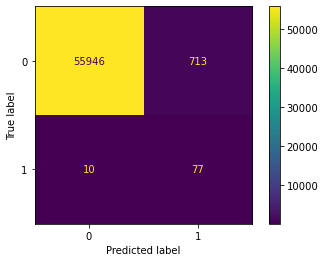

In [138]:
#check for accuracy on test data
print("svc score : ", svc.score(X_test,y_test))

y_pred_svc = svc.predict(X_test)
print(f1_score(y_test, y_pred_svc))

plot_confusion_matrix(svc,X_test, y_test)
#confusion_matrix(y_test, y_pred_svc)